[Check My Github For More](https://github.com/AmirHHasani)

## Part 1

In [1]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [2]:
df = pd.read_csv("PlayTennis.csv")

In [3]:
entropy_node = 0  
values = df.PlayTennis.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.PlayTennis.value_counts()[value]/len(df.PlayTennis)  
    entropy_node += -fraction*np.log2(fraction)


In [4]:
##entropy of the whole dataset
entropy_node

0.9402859586706311

In [5]:
def ent(df,attribute):
    target_variables = df.PlayTennis.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    

    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.PlayTennis ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)  
            entropy_each_feature += -fraction*log(fraction+eps) 
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste

    return(abs(entropy_attribute))

In [6]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'Outlook': 0.6935361388961914,
 'Temperature': 0.9110633930116756,
 'Humidity': 0.7884504573082889,
 'Wind': 0.892158928262361}

In [7]:
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

In [8]:
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}


In [9]:
def find_entropy(df):
    Class = df.keys()[-1]  
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
    
    return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   
    
    

    #attribute maximum information gain
    node = find_winner(df)
    
   
    attValue = np.unique(df[node])
    
    #create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable['PlayTennis'],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
            
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree
  
  

## D-Tree 

In [10]:
t=buildTree(df)
t

{'Outlook': {'Overcast': 'Yes',
  'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [11]:
for x in t.values():
    print(x)

{'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}


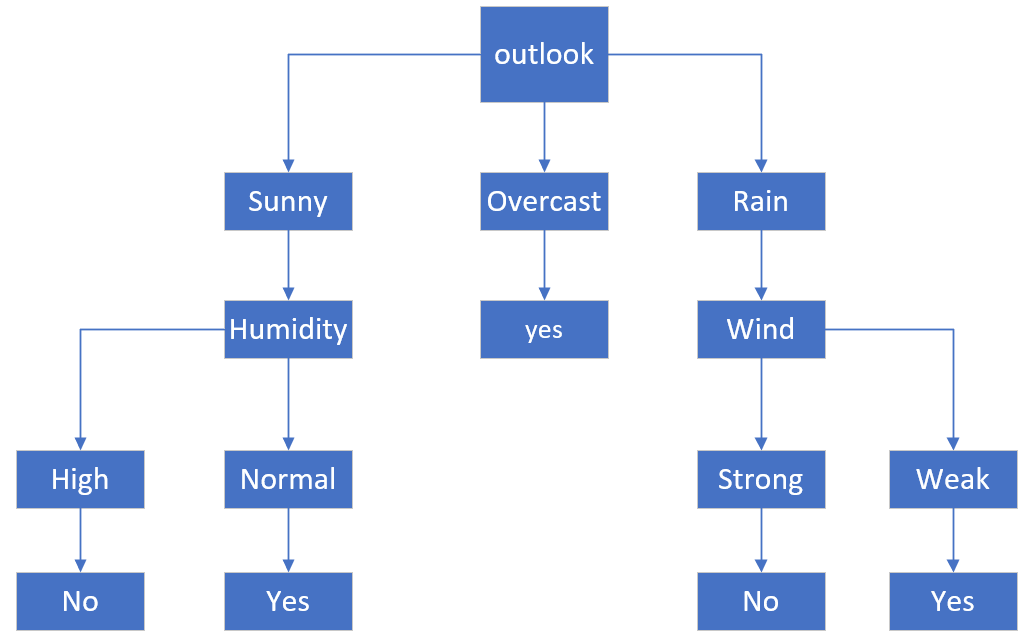